In [218]:
#import all dependencies
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import tensorflow.keras
#from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [219]:
#read the file
df=pd.read_csv('/Users/anilareddy/Downloads/Final_News_DF_Labeled_ExamDataset.csv')
print(df.head())
df.to_csv("Labeled_News_Data_from_API.csv")

      LABEL  according  agency  ahead  alabama  amazon  america  american  \
0  politics          0       0      0        0       0        0         0   
1  politics          0       0      0        0       0        0         0   
2  politics          0       0      0        0       0        0         0   
3  politics          0       0      0        0       0        0         0   
4  politics          0       0      0        0       0        0         0   

   announced  appeared  ...  wolverines  women  work  working  world  wrote  \
0          1         0  ...           0      0     0        0      0      0   
1          0         0  ...           0      0     0        0      0      0   
2          0         0  ...           0      0     0        0      0      0   
3          0         0  ...           0      0     0        0      0      0   
4          0         0  ...           0      0     0        0      0      0   

   year  years  york  young  
0     0      0     0      0  
1 

In [220]:
x = df.drop('LABEL', axis=1)  # Features
y = df['LABEL'].values  # Target variable

In [221]:
X

,according,agency,ahead,alabama,amazon,america,american,announced,appeared,apple,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
y

array(['politics', 'politics', 'politics', ..., 'science', 'science',
       'science'], dtype=object)

In [223]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)
y_categorical

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [224]:
#let's first split into train and temp  and then further split it into test and val- 80% training, 10% testing, 10% validation
x_train, x_temp, y_train, y_temp = train_test_split(x, y_categorical, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)


In [225]:
print("X_train shape:", x_train.shape)
print("X_train:", x_train)
print("X_test shape:", x_test.shape)
print("X_test:", x_test)


X_train shape: (1194, 300)
X_train:       according  agency  ahead  alabama  amazon  america  american  announced  \
1223          0       0      0        0       0        0         0          0   
432           0       0      0        0       0        0         0          0   
1473          0       0      0        0       0        0         0          0   
598           0       0      0        0       0        0         0          0   
1006          0       0      0        0       0        0         0          0   
...         ...     ...    ...      ...     ...      ...       ...        ...   
1197          0       0      0        0       0        0         0          0   
1299          0       0      0        0       0        0         0          0   
1167          0       0      0        0       0        0         0          0   
220           0       0      0        0       0        0         0          0   
1137          0       0      0        0       0        0         0       

In [226]:
print("y_train shape:", y_train.shape)
print("y_train:", y_train)
print("y_test shape:", y_test.shape)
print("y_test:", y_test)

y_train shape: (1194, 3)
y_train: [[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]
y_test shape: (150, 3)
y_test: [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 

In [227]:
print("x_val shape:",x_val.shape)
print("x_val:",x_val)
print("y_val shape:", y_val.shape)
print("y_val:",y_val)

x_val shape: (149, 300)
x_val:       according  agency  ahead  alabama  amazon  america  american  announced  \
448           0       0      0        0       0        0         0          0   
475           0       0      0        0       0        0         0          0   
1115          0       0      0        0       0        0         0          0   
883           0       0      0        0       0        0         0          0   
1458          0       0      0        0       0        0         0          0   
...         ...     ...    ...      ...     ...      ...       ...        ...   
803           0       0      0        0       0        0         0          0   
749           0       0      0        0       0        0         0          0   
341           1       0      0        0       0        0         0          0   
672           0       0      0        0       0        0         0          0   
362           0       0      0        0       0        0         0          0 

# ANN

In [228]:
fnum = X.shape[1]
cnum = y_categorical.shape[1]

In [229]:
fnum

300

In [230]:
cnum

3

In [231]:
ANN_model = Sequential()
ANN_model.add(Dense(512,input_shape=(fnum,),activation='relu'))
ANN_model.add(BatchNormalization())
ANN_model.add(Dense(256, activation='relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(cnum, activation='softmax'))


In [232]:
ANN_model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 512)               154112    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_50 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_51 (Dense)            (None, 3)                 771       
                                                                 
Total params: 288259 (1.10 MB)
Trainable params: 287235 (1.10 MB)
Non-trainable params: 1024 (4.00 KB)
________________

In [233]:
ANN_model.compile(
                 loss="categorical_crossentropy",
                 metrics=["accuracy"],
                 optimizer='adam'                
                 )
history=ANN_model.fit(x_train,y_train, epochs=10,validation_data=(x_val, y_val))             

Epoch 1/10
38/38 [==============================] - 2s 12ms/step - loss: 1.0481 - accuracy: 0.5653 - val_loss: 0.9497 - val_accuracy: 0.6577
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4550 - accuracy: 0.8015 - val_loss: 0.9011 - val_accuracy: 0.6980
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.3325 - accuracy: 0.8593 - val_loss: 0.8468 - val_accuracy: 0.7248
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2709 - accuracy: 0.8861 - val_loss: 0.7976 - val_accuracy: 0.7114
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2468 - accuracy: 0.9028 - val_loss: 0.7518 - val_accuracy: 0.7047
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.1955 - accuracy: 0.9221 - val_loss: 0.7110 - val_accuracy: 0.6980
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.1718 - accuracy: 0.9280 - val_loss: 0.6883 - val_accuracy: 0.6510
Epoch 8/10
38/38 [=

In [234]:
score = ANN_model.evaluate(x_test,y_test)
print("accuracy:", score[1]*100)

5/5 [==============================] - 0s 3ms/step - loss: 0.6720 - accuracy: 0.7400
accuracy: 74.00000095367432


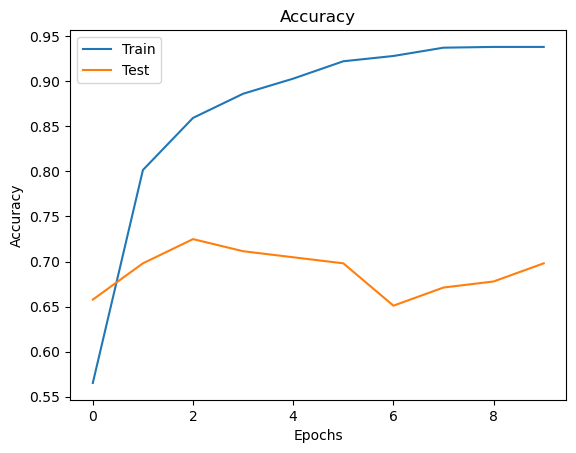

In [235]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

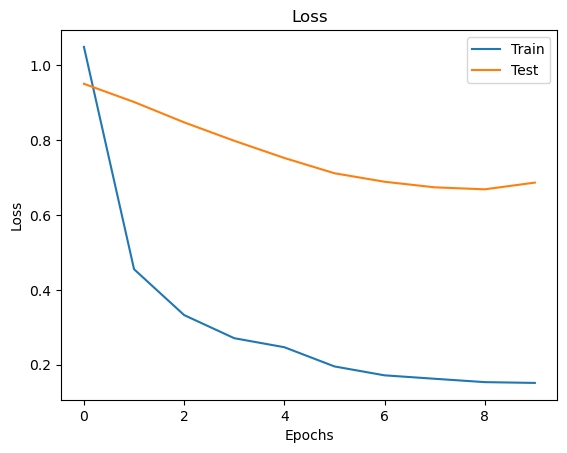

In [236]:
plt.figure()
plt.plot(history.history["loss"],label="Train");
plt.plot(history.history["val_loss"],label="Test");
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [237]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

Y_pred = ANN_model.predict(X_test)
Y_pred = Y_pred.argmax(axis=1)
Y_true = y_test.argmax(axis=1)

5/5 [==============================] - 0s 2ms/step


In [238]:
Y_pred

array([2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0,
       2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0,
       1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2,
       0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 1,
       2, 0, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1])

In [239]:
Y_true

array([0, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2,
       0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 1, 1,
       0, 0, 0, 2, 0, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2,
       0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1,
       1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2,
       0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1])

[[17 15 17]
 [19 21 15]
 [16 15 15]]


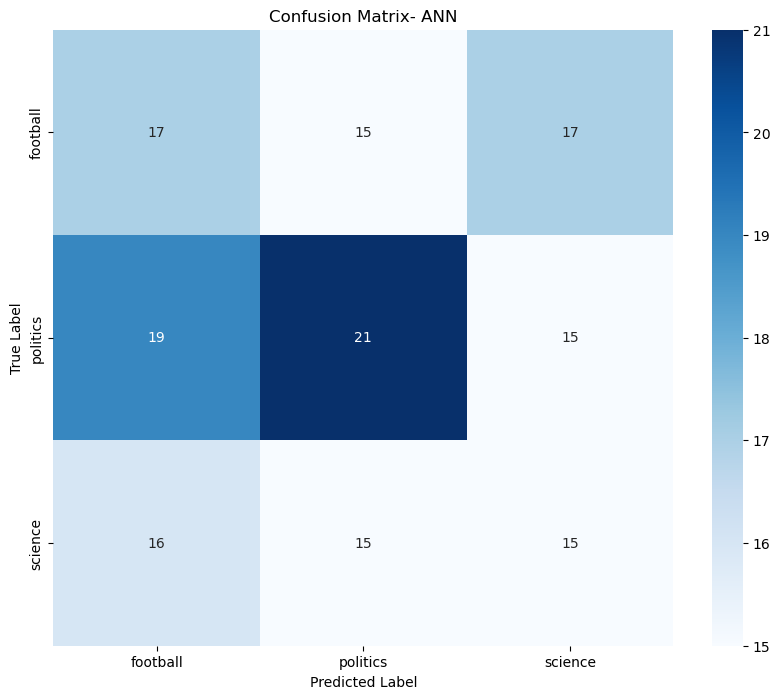

In [240]:
# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
print(cm)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix- ANN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# CNN

In [266]:
from tensorflow.keras.layers import Reshape, Conv1D, MaxPooling1D, Embedding, Flatten
CNN_model = Sequential()
CNN_model.add(Dense(128, activation='relu', input_shape=(fnum,)))
CNN_model.add(Reshape((128, 1))) 
CNN_model.add(Conv1D(64, 3, activation='relu')),
CNN_model.add(MaxPooling1D(pool_size=2)),
CNN_model.add(Flatten())
CNN_model.add(Dense(256, activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(cnum, activation='softmax'))

In [267]:
CNN_model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 128)               38528     
                                                                 
 reshape_10 (Reshape)        (None, 128, 1)            0         
                                                                 
 conv1d_20 (Conv1D)          (None, 126, 64)           256       
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 63, 64)            0         
 ng1D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 4032)              0         
                                                                 
 dense_64 (Dense)            (None, 256)               1032448   
                                                     

In [268]:
CNN_model.compile(
                 loss="categorical_crossentropy",
                 metrics=["accuracy"],
                 optimizer='adam'              
                 )         
history=CNN_model.fit(x_train,y_train, epochs=10,validation_data=(x_val, y_val))    

Epoch 1/10
38/38 [==============================] - 2s 23ms/step - loss: 0.9892 - accuracy: 0.4908 - val_loss: 0.8389 - val_accuracy: 0.6913
Epoch 2/10
38/38 [==============================] - 1s 15ms/step - loss: 0.6517 - accuracy: 0.7144 - val_loss: 0.7033 - val_accuracy: 0.6980
Epoch 3/10
38/38 [==============================] - 1s 15ms/step - loss: 0.4446 - accuracy: 0.8258 - val_loss: 0.6934 - val_accuracy: 0.7114
Epoch 4/10
38/38 [==============================] - 1s 15ms/step - loss: 0.3199 - accuracy: 0.8719 - val_loss: 0.7899 - val_accuracy: 0.6980
Epoch 5/10
38/38 [==============================] - 1s 15ms/step - loss: 0.2458 - accuracy: 0.8945 - val_loss: 0.8403 - val_accuracy: 0.6711
Epoch 6/10
38/38 [==============================] - 1s 16ms/step - loss: 0.1887 - accuracy: 0.9204 - val_loss: 0.9391 - val_accuracy: 0.6711
Epoch 7/10
38/38 [==============================] - 1s 15ms/step - loss: 0.1637 - accuracy: 0.9338 - val_loss: 0.9915 - val_accuracy: 0.7047
Epoch 8/10
38

In [269]:
score = CNN_model.evaluate(x_test,y_test)
print("accuracy:", score[1]*100)

5/5 [==============================] - 0s 4ms/step - loss: 1.2425 - accuracy: 0.7333
accuracy: 73.33333492279053


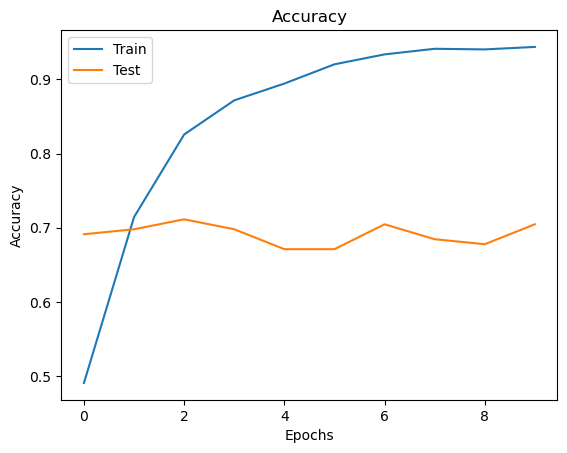

In [270]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

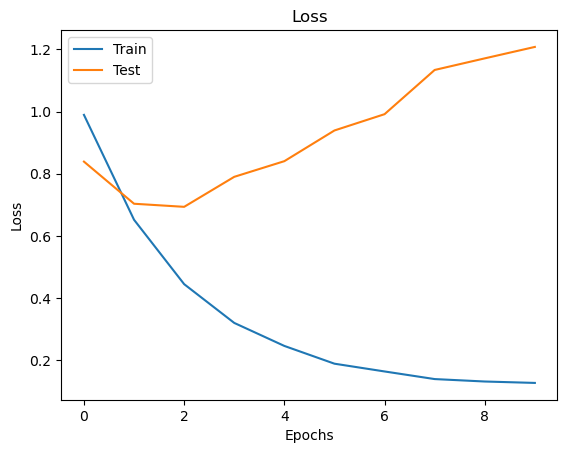

In [271]:
plt.figure()
plt.plot(history.history["loss"],label="Train");
plt.plot(history.history["val_loss"],label="Test");
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [272]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

Y_pred = CNN_model.predict(X_test)
Y_pred = Y_pred.argmax(axis=1)
Y_true = y_test.argmax(axis=1)

5/5 [==============================] - 0s 4ms/step


In [273]:
Y_pred

array([2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 2, 1, 2, 2, 0, 0, 2,
       2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0,
       2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0,
       1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2,
       0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1,
       2, 0, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1])

In [274]:
Y_true

array([0, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2,
       0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 1, 1,
       0, 0, 0, 2, 0, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2,
       0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1,
       1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2,
       0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1])

[[17 16 16]
 [19 22 14]
 [15 17 14]]


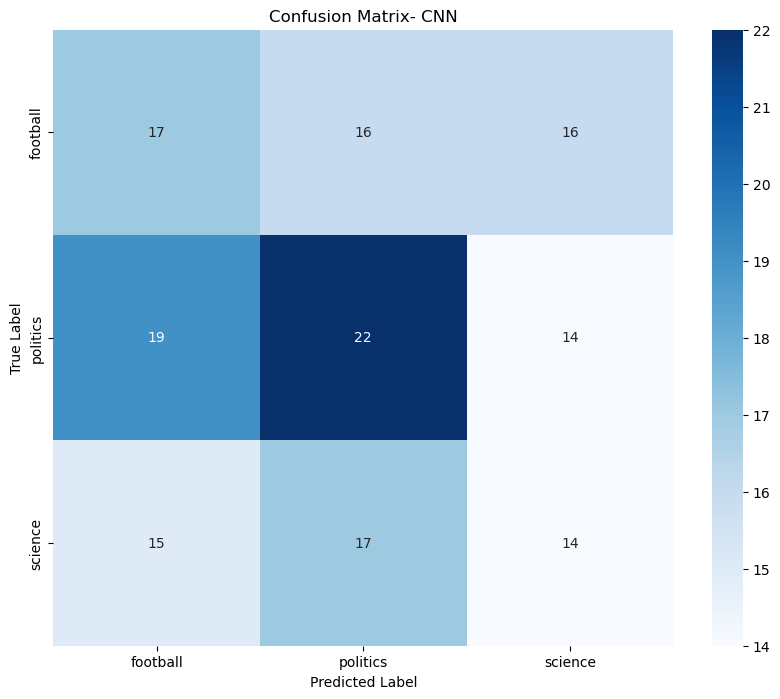

In [275]:
# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
print(cm)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix- CNN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# LSTM

In [251]:
LSTM_model = Sequential()
LSTM_model.add(Dense(128, activation='relu', input_shape=(fnum,)))
LSTM_model.add(Reshape((128, 1)))  # Reshape for LSTM
LSTM_model.add(LSTM(64))
LSTM_model.add(Dropout(0.5))  
LSTM_model.add(Dense(cnum, activation='softmax'))

In [260]:
LSTM_model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 128)               38528     
                                                                 
 reshape_8 (Reshape)         (None, 128, 1)            0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                16896     
                                                                 
 dense_57 (Dense)            (None, 3)                 195       
                                                                 
Total params: 55619 (217.26 KB)
Trainable params: 55619 (217.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [252]:
LSTM_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [253]:
LSTM_model = lstm_model(input_shape, output_shape)

In [254]:
history=LSTM_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
38/38 [==============================] - 6s 66ms/step - loss: 1.0980 - accuracy: 0.3551 - val_loss: 1.0887 - val_accuracy: 0.5034
Epoch 2/10
38/38 [==============================] - 1s 39ms/step - loss: 0.9380 - accuracy: 0.5687 - val_loss: 0.8157 - val_accuracy: 0.6376
Epoch 3/10
38/38 [==============================] - 2s 43ms/step - loss: 0.6339 - accuracy: 0.7479 - val_loss: 0.7788 - val_accuracy: 0.6846
Epoch 4/10
38/38 [==============================] - 2s 42ms/step - loss: 0.4572 - accuracy: 0.8183 - val_loss: 0.7271 - val_accuracy: 0.7114
Epoch 5/10
38/38 [==============================] - 2s 47ms/step - loss: 0.3549 - accuracy: 0.8576 - val_loss: 1.1401 - val_accuracy: 0.5570
Epoch 6/10
38/38 [==============================] - 2s 48ms/step - loss: 0.4383 - accuracy: 0.8451 - val_loss: 0.7149 - val_accuracy: 0.6980
Epoch 7/10
38/38 [==============================] - 2s 41ms/step - loss: 0.2891 - accuracy: 0.8886 - val_loss: 0.9205 - val_accuracy: 0.6711
Epoch 8/10
38

In [255]:
score = LSTM_model.evaluate(x_test,y_test)
print("accuracy:", score[1]*100)

5/5 [==============================] - 0s 14ms/step - loss: 0.9469 - accuracy: 0.7600
accuracy: 75.99999904632568


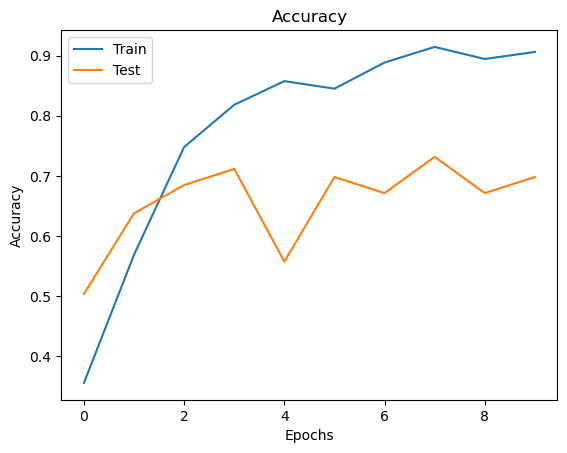

In [256]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

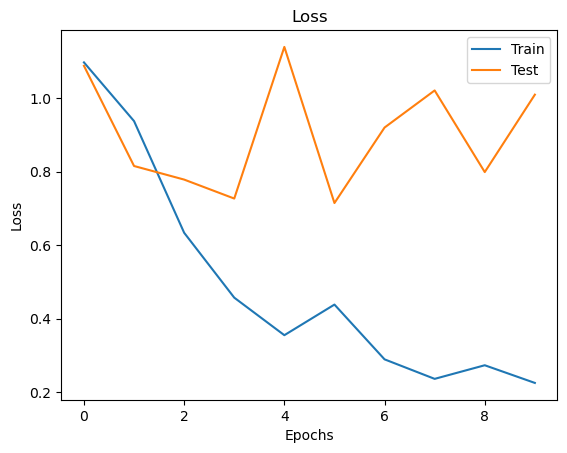

In [257]:
plt.figure()
plt.plot(history.history["loss"],label="Train");
plt.plot(history.history["val_loss"],label="Test");
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [258]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

Y_pred = LSTM_model.predict(X_test)
Y_pred = Y_pred.argmax(axis=1)
Y_true = y_test.argmax(axis=1)

5/5 [==============================] - 1s 13ms/step


In [261]:
Y_pred

array([2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0,
       2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0,
       1, 2, 2, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2,
       0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 1,
       2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1])

In [262]:
Y_true

array([0, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2,
       0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 1, 1,
       0, 0, 0, 2, 0, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2,
       0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1,
       1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2,
       0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1])

[[17 13 19]
 [19 20 16]
 [17 13 16]]


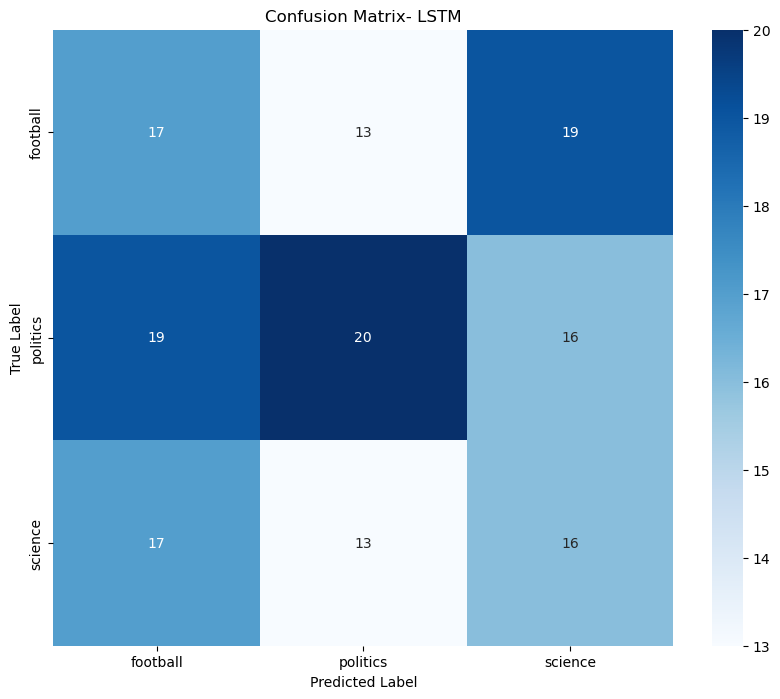

In [259]:
# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
print(cm)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix- LSTM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()